# Explore Zika research through text data mining

## What is this, where am I?

This is an jupyter-notebook, an interactive programming environment for python. It consists of cells like this, which contain text, images, or executable code.

You can proceed through each cell by selecting it and pressing `Ctrl + Enter` or by clicking on the `Play` button in the menu bar. This notebook comes with "batteries included", which means it contains some example data and functions we have prepared in advance.

You don't need to know how to program in order to participate and to use this notebook. If you already know some python, please feel free to modify, change and experiment with the code and data.

You find all necessary informations on our central [FutureTDM GitHub repository](https://github.com/ContentMine/FutureTDM).

## What are we going to do?

We will explore the scientific publications downloaded as explained in the [Zika virus tutorial](https://github.com/ContentMine/FutureTDM/tutorials/zika). 

## Set up your environment
Import the prepared python functions into the notebook. If you want to know more about pyCProject, the ContentMine Python wrapper for the [CProject](https://github.com/ContentMine/workshop-resources/blob/master/software-tutorials/cproject/README.md), have a look at the [GitHub repository](https://github.com/ContentMine/pyCProject).

In [1]:
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from pycproject.readctree import CProject
from pycproject.factnet import *
import os
from collections import Counter

%matplotlib inline

**Define all functions used in the notebook:**

In [2]:
def get_word_frequencies(cproject):
    words = Counter()
    for ctree in cproject.get_ctrees():
        if 'word' in ctree.results:
            for word in ctree.results['word']['frequencies']:
                words.update({word['word'], int(word['count'])})
    return words

In [3]:
def get_pub_years(cprojects):
    years_list = []
    final_years_list = []
    max_year = 0
    min_year = 3000
    
    for cproject in cprojects:
        years = Series()
        for ctree in cproject.get_ctrees():
            year = str(ctree.first_publication_date)[2:6]
            if int(year) < min_year:
                min_year = int(year)
            if int(year) > max_year:
                max_year = int(year)
            if year in years:
                years[year] += 1
            else:
                years[year] = 1
        years_list.append(years)

    for years in years_list:
        final_years = Series()
        
        for i in range(max_year - min_year):
            if str(min_year + i) in years:
                final_years[str(min_year + i)] = years[str(min_year + i)]
            else: 
                final_years[str(min_year + i)] = 0
        
        final_years_list.append(final_years.sort_index())
    return final_years_list

In [4]:
def get_authors(cproject):
    authors = Counter()
    for ctree in cproject.get_ctrees():
        if 'authorList' in ctree.metadata:
            #print(ctree.metadata['authorList'][0]['author'])
            ctree_authors = ctree.metadata['authorList'][0]['author']
            for ctree_author in ctree_authors:
                if 'fullName' in ctree_author:
                    authors.update(ctree_author['fullName'])
    return authors

In [5]:
def get_journals(cproject):
    journals = Counter()
    for ctree in cproject.get_ctrees():
        if 'journalInfo' in ctree.metadata:
            #print(ctree.metadata['authorList'][0]['author'])
            ctree_journals = ctree.metadata['journalInfo'][0]['journal']
            for ctree_journal in ctree_journals:
                if 'title' in ctree_journal:
                    journals.update(ctree_journal['title'])
    return journals

In [6]:
def get_words(words, num_pubs):
    n_words = []
    for word, count in words.most_common(num_pubs):
        n_words.append((word, count))
    return n_words

### Reading in the datasets

In the next cell we read in the prepared data, which is located in the trialsjournal folder, into the notebook and assign it to the TRIALS variable. This data contains the results from executing the ContentMine tool chain. Each CProject itself contains many `CTrees`, one for each publication, which are the building blocks of our dataset.

In [7]:
zika = CProject("", "zika") # empty path value means we are already in the root directory
print(zika.size)

1128


In [8]:
aedesaegypti = CProject("", "aedesaegypti") # empty path value means we are already in the root directory
print(aedesaegypti.size)

245


In [9]:
usutu = CProject("", "usutu") # empty path value means we are already in the root directory
print(usutu.size)

199


## Explore the metadata

### See the publication years
Get list of publication years for each dataset and plot the timelines.

In [10]:
years = get_pub_years([zika, aedesaegypti, usutu])

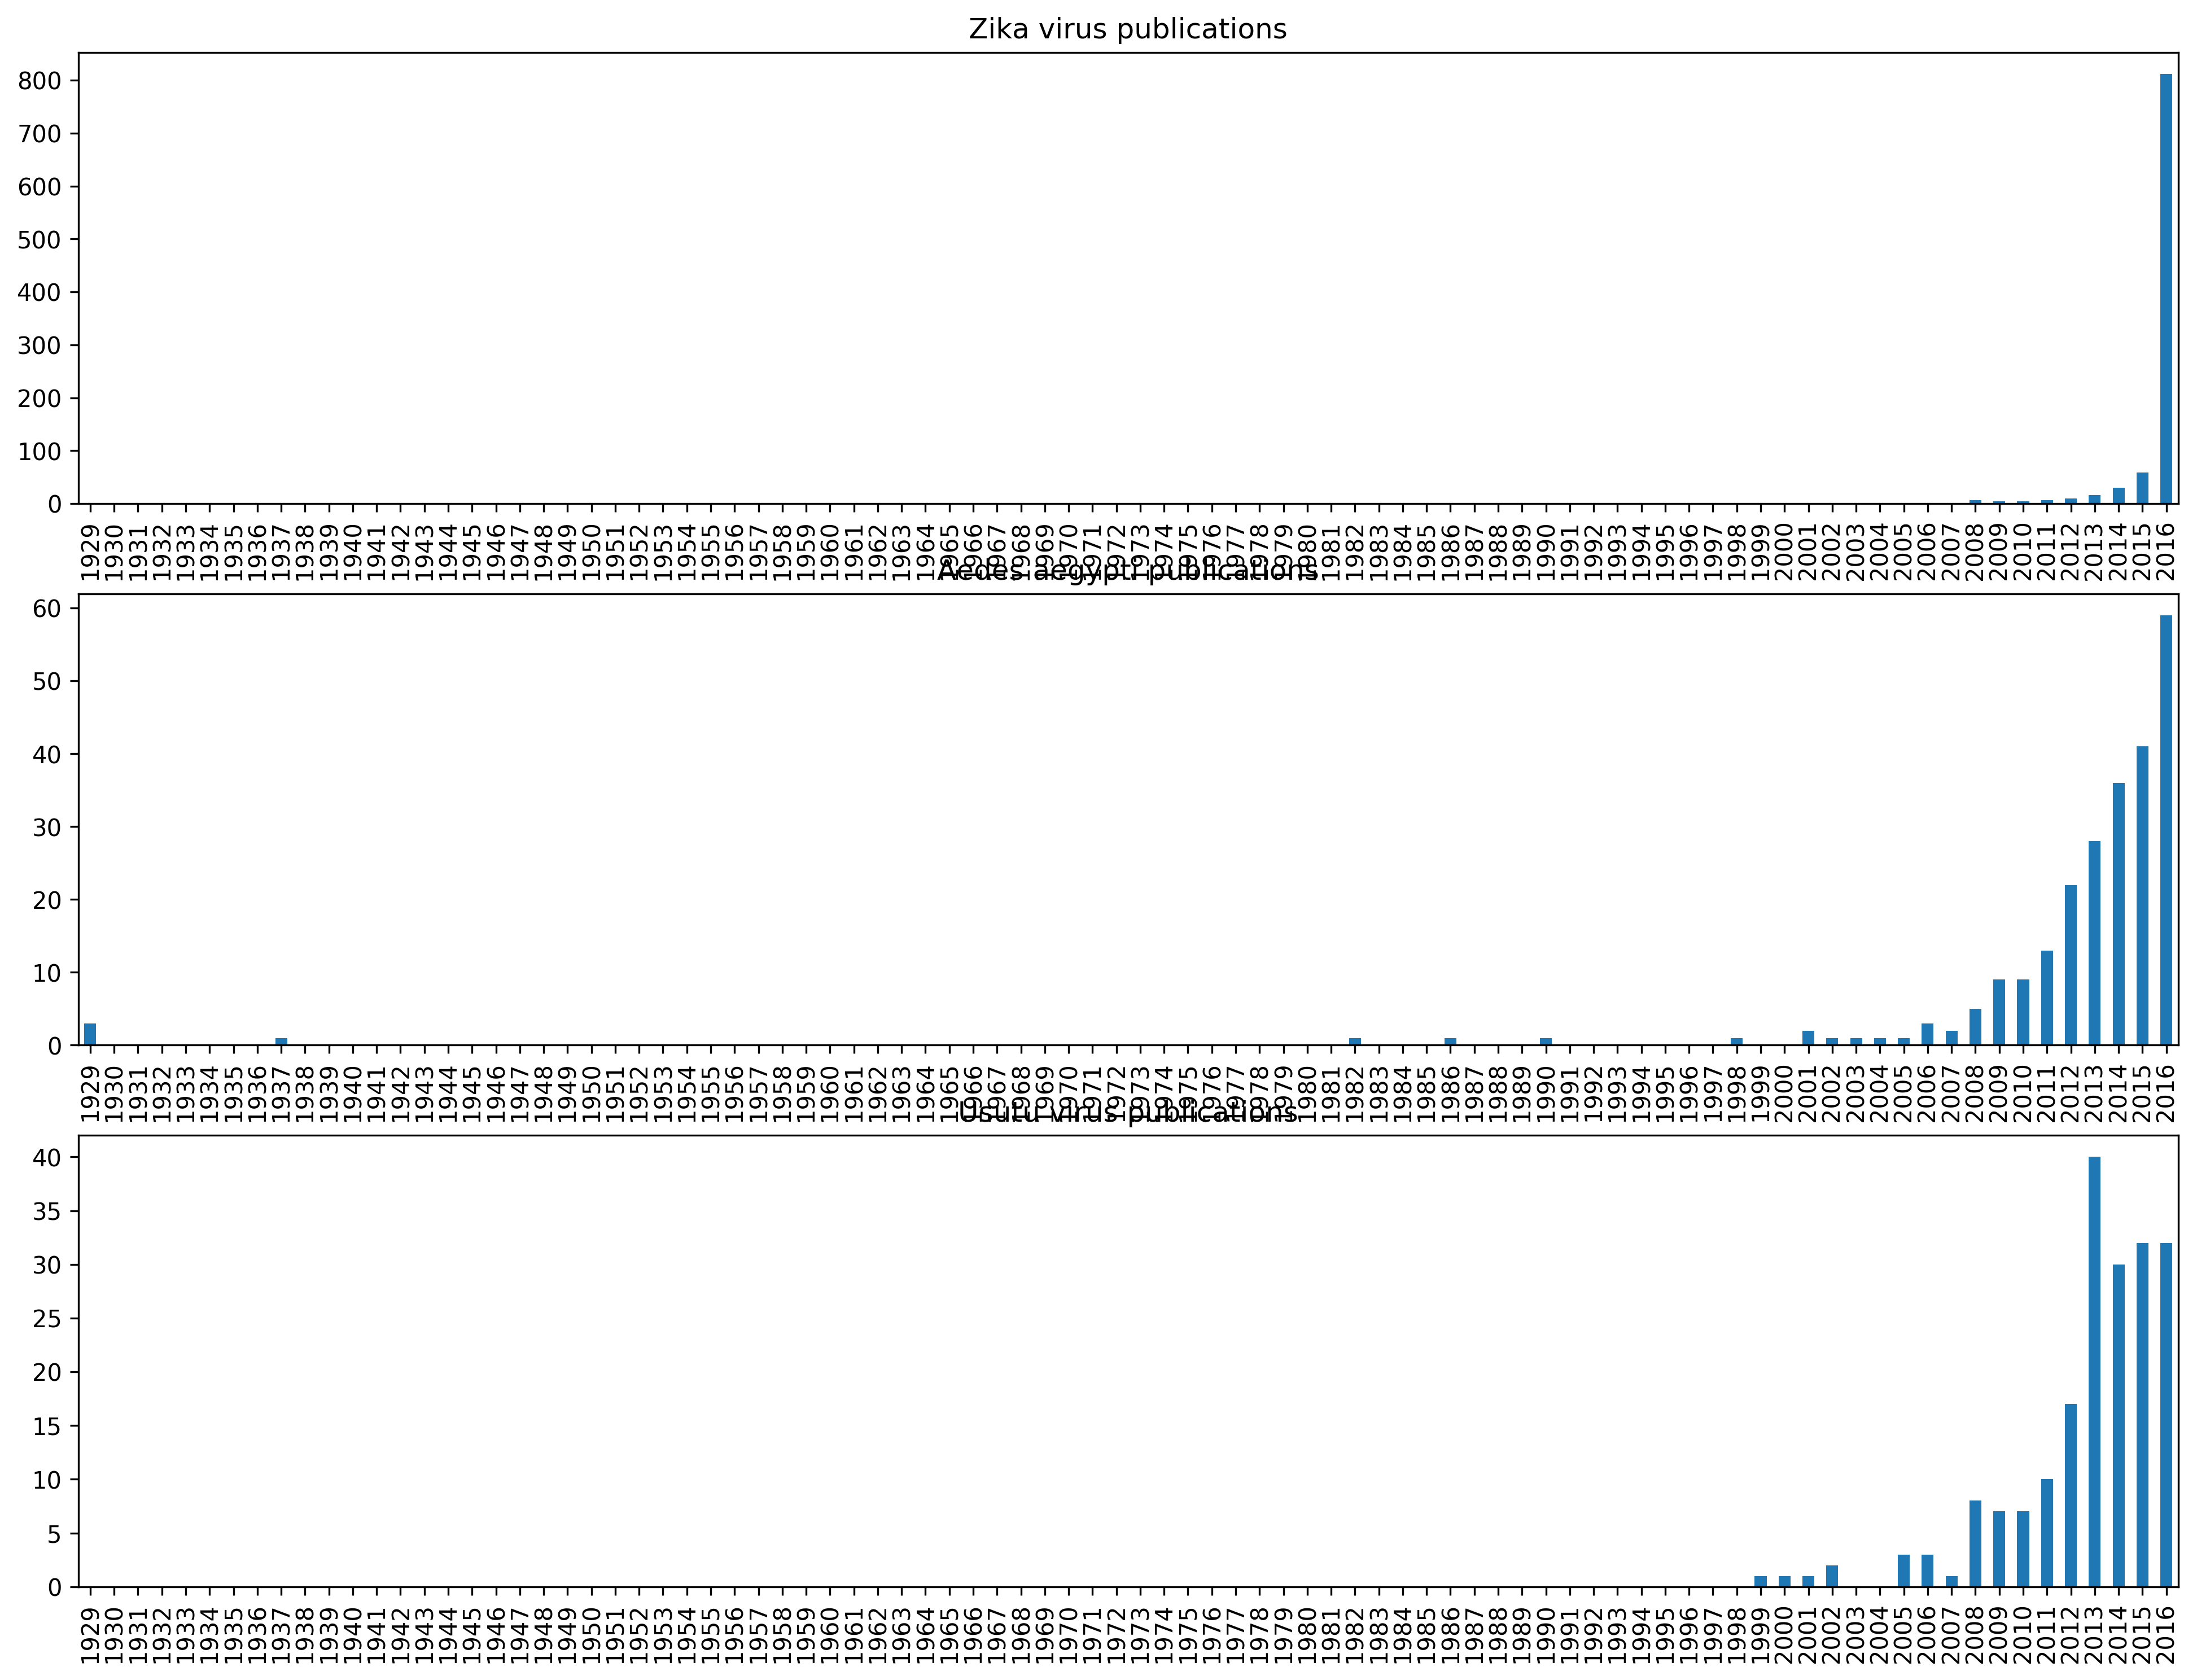

In [11]:
fig = plt.figure(figsize=(16, 12), dpi=300)

# draw subplot 1 = zika
ax1 = fig.add_subplot(3, 1, 1)
years[0].plot(kind='bar', ax=ax1)
ax1.set_title('Zika virus publications')

# draw subplot 2 = aedesaegytpi
ax2 = fig.add_subplot(3, 1, 2)
years[1].plot(kind='bar', ax=ax2)
ax2.set_title('Aedes aegypti publications')

# draw subplot 3 = usutu
ax3 = fig.add_subplot(3, 1, 3)
years[2].plot(kind='bar', ax=ax3)
ax3.set_title('Usutu virus publications')

# save plot
plt.savefig('../../images/timeline.svg')

### Explore the authors
List the most common authors.

In [12]:
zika_authors = get_authors(zika)

# num_authors = len(authors) # set to this, if you want to see all authors listed up
num_authors = 20 # change the value to your needs

for author in zika_authors.most_common()[:num_authors]:
    print(author)

('Faye O', 25)
('Sall AA', 19)
('Weaver SC', 16)
('de Lamballerie X', 11)
('Musso D', 11)
('Cao-Lormeau VM', 10)
('Leparc-Goffart I', 10)
('Osorio JE', 9)
('Aliota MT', 9)
('Diallo M', 9)
('Schmidt-Chanasit J', 8)
('Liu Y', 8)
('Tesh RB', 8)
('Megarbane B', 8)
('Ritchie SA', 7)
('Haddow AD', 7)
('Sardi SI', 7)
('Campos GS', 7)
('Wilder-Smith A', 7)
('Bandeira AC', 7)


In [13]:
aedesaegypti_authors = get_authors(aedesaegypti)

# num_authors = len(authors) # set to this, if you want to see all authors listed up
num_authors = 20 # change the value to your needs

for author in aedesaegypti_authors.most_common()[:num_authors]:
    print(author)

('Schaffner F', 6)
('de Lamballerie X', 6)
('Harbach RE', 6)
('Gould EA', 6)
('Kittayapong P', 5)
('Cook S', 5)
('Weaver SC', 4)
('Sang R', 4)
('Lima-Camara TN', 4)
('Capelli G', 4)
('Walker T', 4)
('Fontenille D', 4)
('Scott TW', 4)
('Kroeger A', 4)
('Montarsi F', 4)
('Le Goff G', 4)
('Reiter P', 4)
('Petzold M', 4)
('Guillaumot L', 4)
('Lourenço-de-Oliveira R', 4)


In [14]:
usutu_authors = get_authors(usutu)

# num_authors = len(authors) # set to this, if you want to see all authors listed up
num_authors = 20 # change the value to your needs

for author in usutu_authors.most_common()[:num_authors]:
    print(author)

('Figuerola J', 12)
('Nowotny N', 11)
('Faye O', 10)
('Soriguer R', 9)
('Jöst H', 8)
('Ziegler U', 8)
('Ruiz S', 8)
('Lecollinet S', 8)
('Saiz JC', 8)
('Gould EA', 8)
('Papa A', 8)
('Becker N', 7)
('Schmidt-Chanasit J', 7)
('Groschup MH', 7)
('Martín-Acebes MA', 7)
('Escribano-Romero E', 7)
('Blázquez AB', 7)
('Llorente F', 6)
('Roiz D', 6)
('Calzolari M', 6)


### Explore the journals

In [15]:
zika_journals = get_journals(zika)

# num_authors = len(zika_journals) # set to this, if you want to see all authors listed up
num_journals = 20 # change the value to your needs

for journal in zika_journals.most_common()[:num_journals]:
    print(journal)

('PLoS neglected tropical diseases', 136)
('Emerging infectious diseases', 77)
('PloS one', 56)
('Scientific reports', 51)
('Parasites & vectors', 39)
('Bulletin of the World Health Organization', 39)
('Frontiers in microbiology', 21)
('PLoS pathogens', 21)
('PLoS currents', 20)
('F1000Research', 20)
('BMC infectious diseases', 20)
('Virology journal', 18)
('Viruses', 17)
('Memorias do Instituto Oswaldo Cruz', 17)
('EBioMedicine', 17)
('Euro surveillance : bulletin Europeen sur les maladies transmissibles = European communicable disease bulletin', 16)
('The American journal of tropical medicine and hygiene', 15)
('mBio', 14)
('Emerging microbes & infections', 12)
('Genome announcements', 11)


In [16]:
aedesaegypti_journals = get_journals(aedesaegypti)

# num_journals = len(aedesaegypti_journals) # set to this, if you want to see all authors listed up
num_journals = 20 # change the value to your needs

for journal in aedesaegypti_journals.most_common()[:num_journals]:
    print(journal)

('PLoS neglected tropical diseases', 50)
('Parasites & vectors', 40)
('PloS one', 34)
('Emerging infectious diseases', 10)
('Memorias do Instituto Oswaldo Cruz', 9)
('The Indian journal of medical research', 7)
('The Journal of experimental medicine', 4)
('The American journal of tropical medicine and hygiene', 4)
('Pathogens and global health', 3)
('BMC genomics', 3)
('International journal of environmental research and public health', 3)
('Journal of insect science (Online)', 3)
('Environmental health perspectives', 2)
('PLoS pathogens', 2)
('Emerging microbes & infections', 2)
('Viruses', 2)
('Malaria journal', 2)
('Medical history', 2)
('F1000Research', 2)
('Revista de saude publica', 2)


In [17]:
usutu_journals = get_journals(usutu)

# num_journals = len(usutu_journals) # set to this, if you want to see all authors listed up
num_journals = 20 # change the value to your needs

for journal in usutu_journals.most_common()[:num_journals]:
    print(journal)

('Emerging infectious diseases', 32)
('PloS one', 31)
('Parasites & vectors', 26)
('PLoS neglected tropical diseases', 16)
('Virology journal', 13)
('Viruses', 6)
('Veterinary research', 6)
('International journal of environmental research and public health', 5)
('BioMed research international', 5)
('Malaria journal', 4)
('Frontiers in microbiology', 4)
('BMC veterinary research', 4)
('Parasitology research', 3)
('Infection ecology & epidemiology', 2)
('PLoS pathogens', 2)
('Ecology and evolution', 2)
('BMC infectious diseases', 2)
('Memorias do Instituto Oswaldo Cruz', 2)
('Journal of biomedicine & biotechnology', 2)
('Frontiers in public health', 2)


## Explore the entities (species, genus, words)

### Explore the words
Print the n most common terms in the papers in decreasing order. To change the number of terms you want to have listed, just change the variable of ```first_n_pubs```.

In [18]:
zika_words = get_word_frequencies(zika)

# num_words = len(zika_words) # set to this, if you want to see all authors listed up
num_words = 20 # change the number to your needs

for word in zika_words.most_common()[:num_words]:
    print(word)

(4, 68342)
(5, 44301)
(6, 27250)
(7, 19458)
(8, 15848)
(9, 10516)
(10, 8362)
(11, 6668)
(12, 5467)
(13, 4488)
(14, 3780)
(17, 3457)
(18, 3194)
(15, 3110)
(16, 2720)
(20, 2716)
(21, 2494)
(29, 1783)
(19, 1773)
(22, 1343)


In [19]:
aedesaegypti_words = get_word_frequencies(aedesaegypti)

# num_words = len(aedesaegypti_words) # set to this, if you want to see all authors listed up
num_words = 20 # change the number to your needs

for word in aedesaegypti_words.most_common()[:num_words]:
    print(word)

(4, 17319)
(5, 11249)
(6, 7079)
(7, 5084)
(8, 4138)
(9, 2761)
(10, 2269)
(11, 1757)
(12, 1465)
(13, 1197)
(14, 1006)
(17, 877)
(15, 845)
(18, 805)
(16, 733)
(20, 689)
(21, 655)
(19, 465)
(29, 432)
(22, 373)


In [20]:
usutu_words = get_word_frequencies(usutu)

# num_words = len(usutu_words) # set to this, if you want to see all authors listed up
num_words = 20 # change the number to your needs

for word in usutu_words.most_common()[:num_words]:
    print(word)

(4, 14739)
(5, 9483)
(6, 6030)
(7, 4282)
(8, 3424)
(9, 2345)
(10, 1909)
(11, 1520)
(12, 1290)
(13, 1120)
(14, 863)
(17, 763)
(15, 751)
(18, 702)
(16, 652)
(20, 598)
(21, 543)
(19, 447)
(29, 354)
(22, 347)


Plot the frequencies as a histogram.

In [21]:
#frequ = [value for key, value in words.most_common()[500:]]

In [22]:
#plt.hist(frequ, bins=100)
#plt.title("Word Frequencies")
#plt.xlabel("Frequencies")
#plt.ylabel("Frequencies of Frequencies")
#plt.show()

### Look at

## Let's dive into the data!

First we create a network between papers and entities such as genes or genus. In this network a node is either a unique identifier of a paper, or the name of the entity. An edge or link between nodes is created when a paper mentions an entity. The entities have been identified through the [ami-plugins](https://github.com/ContentMine/ami/).

### Choose the type of entity

In [23]:
B_binomial, fact_graph, paper_graph, fact_nodes, paper_nodes = create_network(zika, "species", "binomial")
B_genussp, fact_graph, paper_graph, fact_nodes, paper_nodes = create_network(zika, "species", "genussp")
B_genus, fact_graph, paper_graph, fact_nodes, paper_nodes = create_network(zika, "species", "genus")
#plotBipartiteGraph(B_genus)
#plotBipartiteGraph(B_binomial)
#plotBipartiteGraph(B_genussp)

### Check the most mentioned species
Here we list up the most mentioned species in each corpus. This should give us a good overview, and as you can see, it should provide us with some information about virus-transmitters such as Aedes, Flavivirus, etc.

In [24]:
start_with = 0 # enter a number here
how_many = 20 # # this will give us the next 10
degreeCent = nx.algorithms.degree_centrality(B_genus)
for node in sorted(degreeCent, key=degreeCent.get, reverse=True)[start_with:start_with+how_many]:
    print(node, len(B_genus.neighbors(node)))

Aedes 290
Flavivirus 109
Flaviviridae 100
Culex 76
Vascular plant biodiversity of the lower Coppermine River valley and vicinity (Nunavut, Canada): an annotated checklist of an Arctic flora. 73
Wolbachia 55
Anopheles 51
Ribosomal frameshifting and transcriptional slippage: From genetic steganography and cryptography to adventitious use. 39
Drosophila 39
An updated checklist of mosquito species (Diptera: Culicidae) from Madagascar. 34
Making Mosquito Taxonomy Useful: A Stable Classification of Tribe Aedini that Balances Utility with Current Knowledge of Evolutionary Relationships. 33
Plasmodium 31
Microbial control of arthropod-borne disease. 30
Togaviridae 26
DNA Microarray Platform for Detection and Surveillance of Viruses Transmitted by Small Mammals and Arthropods. 22
DNA barcodes from four loci provide poor resolution of taxonomic groups in the genus Crataegus. 21
ESMO / ASCO Recommendations for a Global Curriculum in Medical Oncology Edition 2016. 19
Alphavirus 18
Selective Factor

In [25]:
start_with = 0 # enter a number here
how_many = 20 # # this will give us the next 10
degreeCent = nx.algorithms.degree_centrality(B_binomial)
for node in sorted(degreeCent, key=degreeCent.get, reverse=True)[start_with:start_with+how_many]:
    print(node, len(B_binomial.neighbors(node)))

Vascular plant biodiversity of the lower Coppermine River valley and vicinity (Nunavut, Canada): an annotated checklist of an Arctic flora. 652
Aedes aegypti 360
Ae. aegypti 234
Aedes albopictus 210
An updated checklist of mosquito species (Diptera: Culicidae) from Madagascar. 177
Ae. albopictus 176
Composition and Genetic Diversity of Mosquitoes (Diptera: Culicidae) on Islands and Mainland Shores of Kenya's Lakes Victoria and Baringo. 78
Diversity of Cultivable Midgut Microbiota at Different Stages of the Asian Tiger Mosquito, Aedes albopictus from Tezpur, India. 76
Mosquito Oviposition Behavior and Vector Control. 74
Mushroom Polysaccharides: Chemistry and Antiobesity, Antidiabetes, Anticancer, and Antibiotic Properties in Cells, Rodents, and Humans. 69
A. aegypti 68
Biodiversity and Temporal Distribution of Immature Culicidae in the Atlantic Forest, Rio de Janeiro State, Brazil. 64
Mosquitoes (Diptera: Culicidae) in Mauritania: a review of their biodiversity, distribution and medica

In [26]:
start_with = 0 # enter a number here
how_many = 20 # # this will give us the next 10
degreeCent = nx.algorithms.degree_centrality(B_genussp)
for node in sorted(degreeCent, key=degreeCent.get, reverse=True)[start_with:start_with+how_many]:
    print(node, len(B_genussp.neighbors(node)))

Aedes spp 62
Culex spp 22
Aedes sp 15
Mayaro virus and dengue virus 1 and 4 natural infection in culicids from Cuiabá, state of Mato Grosso, Brazil. 14
Culex sp 9
The persistence and ecological impacts of a cyanobacterium genetically engineered to express mosquitocidal Bacillus thuringiensis toxins. 9
Composition and Genetic Diversity of Mosquitoes (Diptera: Culicidae) on Islands and Mainland Shores of Kenya's Lakes Victoria and Baringo. 8
Deep sequencing of the 16S ribosomal RNA of the neonatal oral microbiome: a comparison of breast-fed and formula-fed infants. 8
New insights into flavivirus evolution, taxonomy and biogeographic history, extended by analysis of canonical and alternative coding sequences. 8
Molecular detection of flaviviruses and alphaviruses in mosquitoes (Diptera: Culicidae) from coastal ecosystems in the Colombian Caribbean. 8
An updated checklist of mosquito species (Diptera: Culicidae) from Madagascar. 7
Polyphenol-Rich Diets Exacerbate AMPK-Mediated Autophagy, D

## Get all publications where a specific entity is mentioned
Now we want to explore, in which publications an entity was mentioned. Pick a name from the list above!

**Choose one specific entity for your further analysis.**

Change the string to your chosen species. Beware: If you choose one with more than 5 neighbors it should give you some interesting results.

In [27]:
my_species = "Culex"
my_species in fact_nodes

True

In [28]:
print("Number of neighbors:", len(B_genus.neighbors(my_species)))
for idx, neighbor in enumerate(B_genus.neighbors(my_species)):
    print(idx, ':', neighbor)

Number of neighbors: 76
0 : Probable non-vector-borne transmission of Zika virus, Colorado, USA.
1 : Mayaro virus and dengue virus 1 and 4 natural infection in culicids from Cuiabá, state of Mato Grosso, Brazil.
2 : New insights into flavivirus evolution, taxonomy and biogeographic history, extended by analysis of canonical and alternative coding sequences.
3 : Looking Backward, Looking Forward: The Long, Torturous Struggle with Mosquitoes.
4 : Oviposition ecology and species composition of Aedes spp. and Aedes aegypti dynamics in variously urbanized settings in arbovirus foci in southeastern Côte d'Ivoire.
5 : A Cluster-Randomized Controlled Trial to Reduce Diarrheal Disease and Dengue Entomological Risk Factors in Rural Primary Schools in Colombia.
6 : Integrating the public in mosquito management: active education by community peers can lead to significant reduction in peridomestic container mosquito habitats.
7 : Animals in the Zika Virus Life Cycle: What to Expect from Megadiverse

## Find local communities
We identify the three biggest communities of entities and plot them separately. A community subgraph is a collection of e.g. persons that are connected with each other, but not with the rest of the network. It also prints the location/organization/perons with the most connections in the community.

Aedes


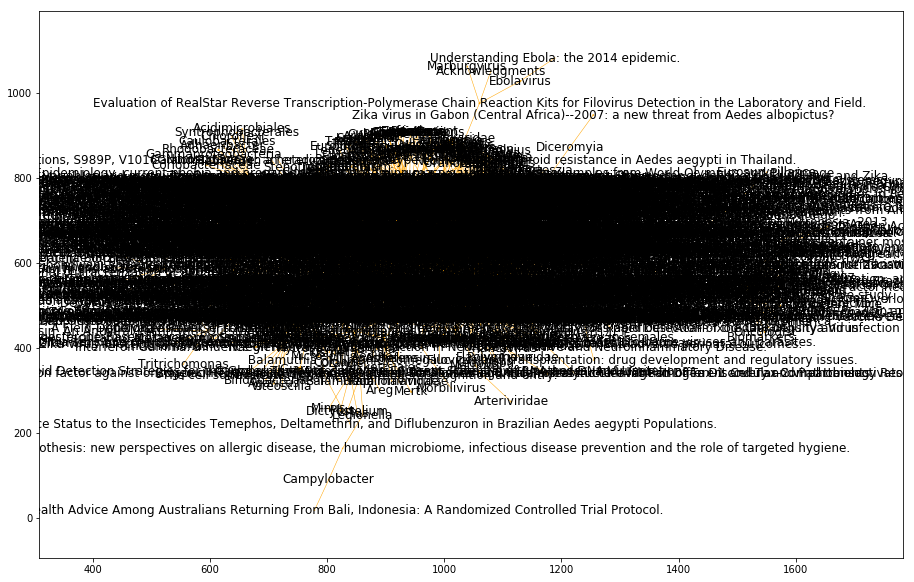

Vascular plant biodiversity of the lower Coppermine River valley and vicinity (Nunavut, Canada): an annotated checklist of an Arctic flora.


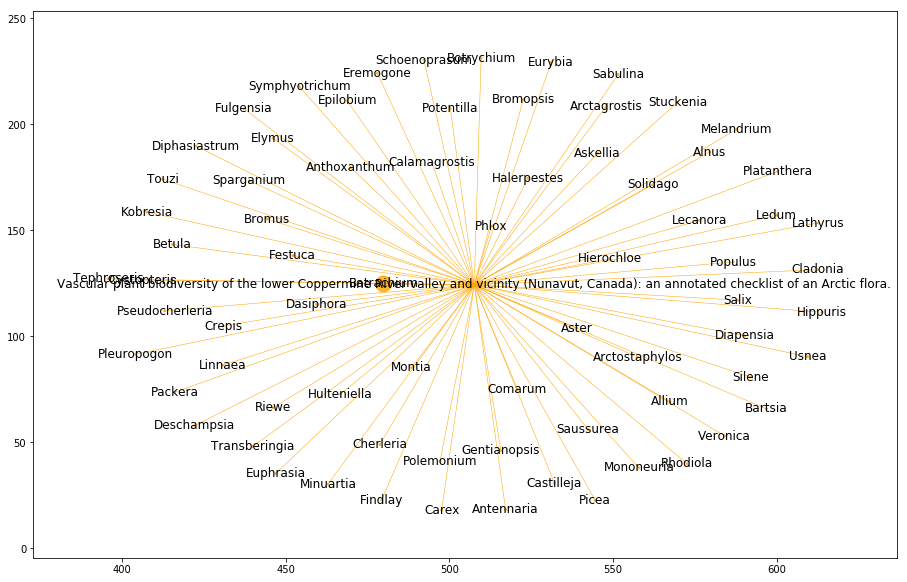

DNA barcodes from four loci provide poor resolution of taxonomic groups in the genus Crataegus.


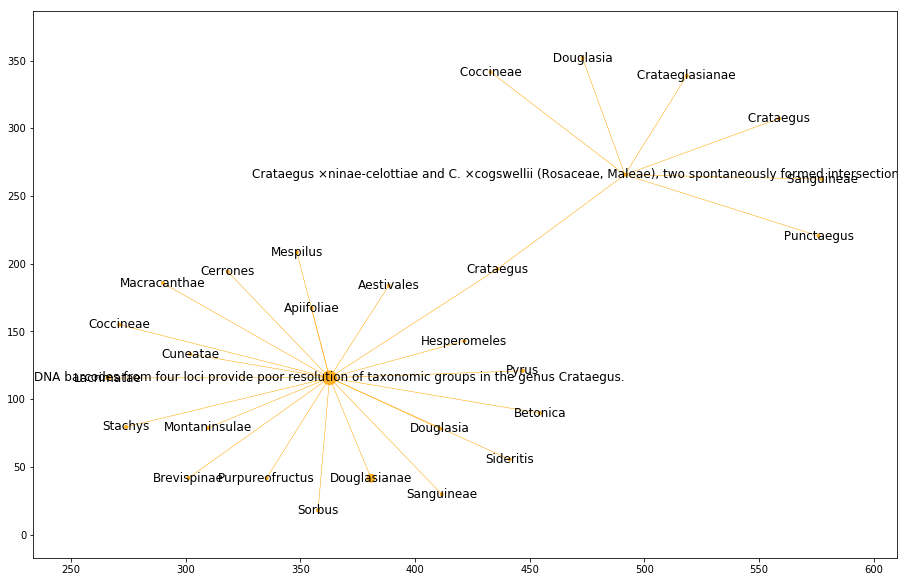

In [29]:
start_with = 0 # pick a number between 1 and 50
how_many = 3 # choose the number of communities you want to plot between 1 and 5. More takes a lot of space in your notebook
subgraphs = sorted(nx.connected_component_subgraphs(B_genus), key=len, reverse=True)[start_with:start_with+how_many]
for sg in subgraphs:
    degreeCent = nx.algorithms.degree_centrality(sg)
    print(max(degreeCent, key=degreeCent.get))
    plotGraph(sg, "orange").show() # choose a color, e.g. red, blue, green, ...

### Your network
The next cell creates a high resolution visualization of the network around your chosen organization/person/location, where related facts, papers they are mentioned in, and also the authors who wrote the papers are visualized. The network will also be saved onto your disk for further usage, like wallpapers, blogging or documentation. You can find it in the MozFest2015 folder.

Don't forget to choose a color!

In [30]:
your_graph = create_subgraph(TRIALS, B_genus, B_genus, your_variable)
save_graph(your_graph, "orange")

NameError: name 'TRIALS' is not defined

## Put a fact into context

In the next cell you can enter an institution/location/person of you interest, and see in which papers they are mentioned, what their titles are. Depending on how busy it was, the list can get a bit long! You can look into the `trialsjournal` folder, open the sbfolder with the ID, and compare it with the acknowledgements section of the paper.

In [ ]:
# your_variable = "Japan"
for ID in B.neighbors(your_variable):
    print ID, TRIALS.get_title(ID)
    print TRIALS.get_ctree(ID).get_section("Acknowledgements")

In [32]:
%%capture
M, fact_graph, paper_graph, fact_nodes, paper_nodes = create_complete_graph(zika)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.4/dist-packages/matplotlib/pyplot.py'>

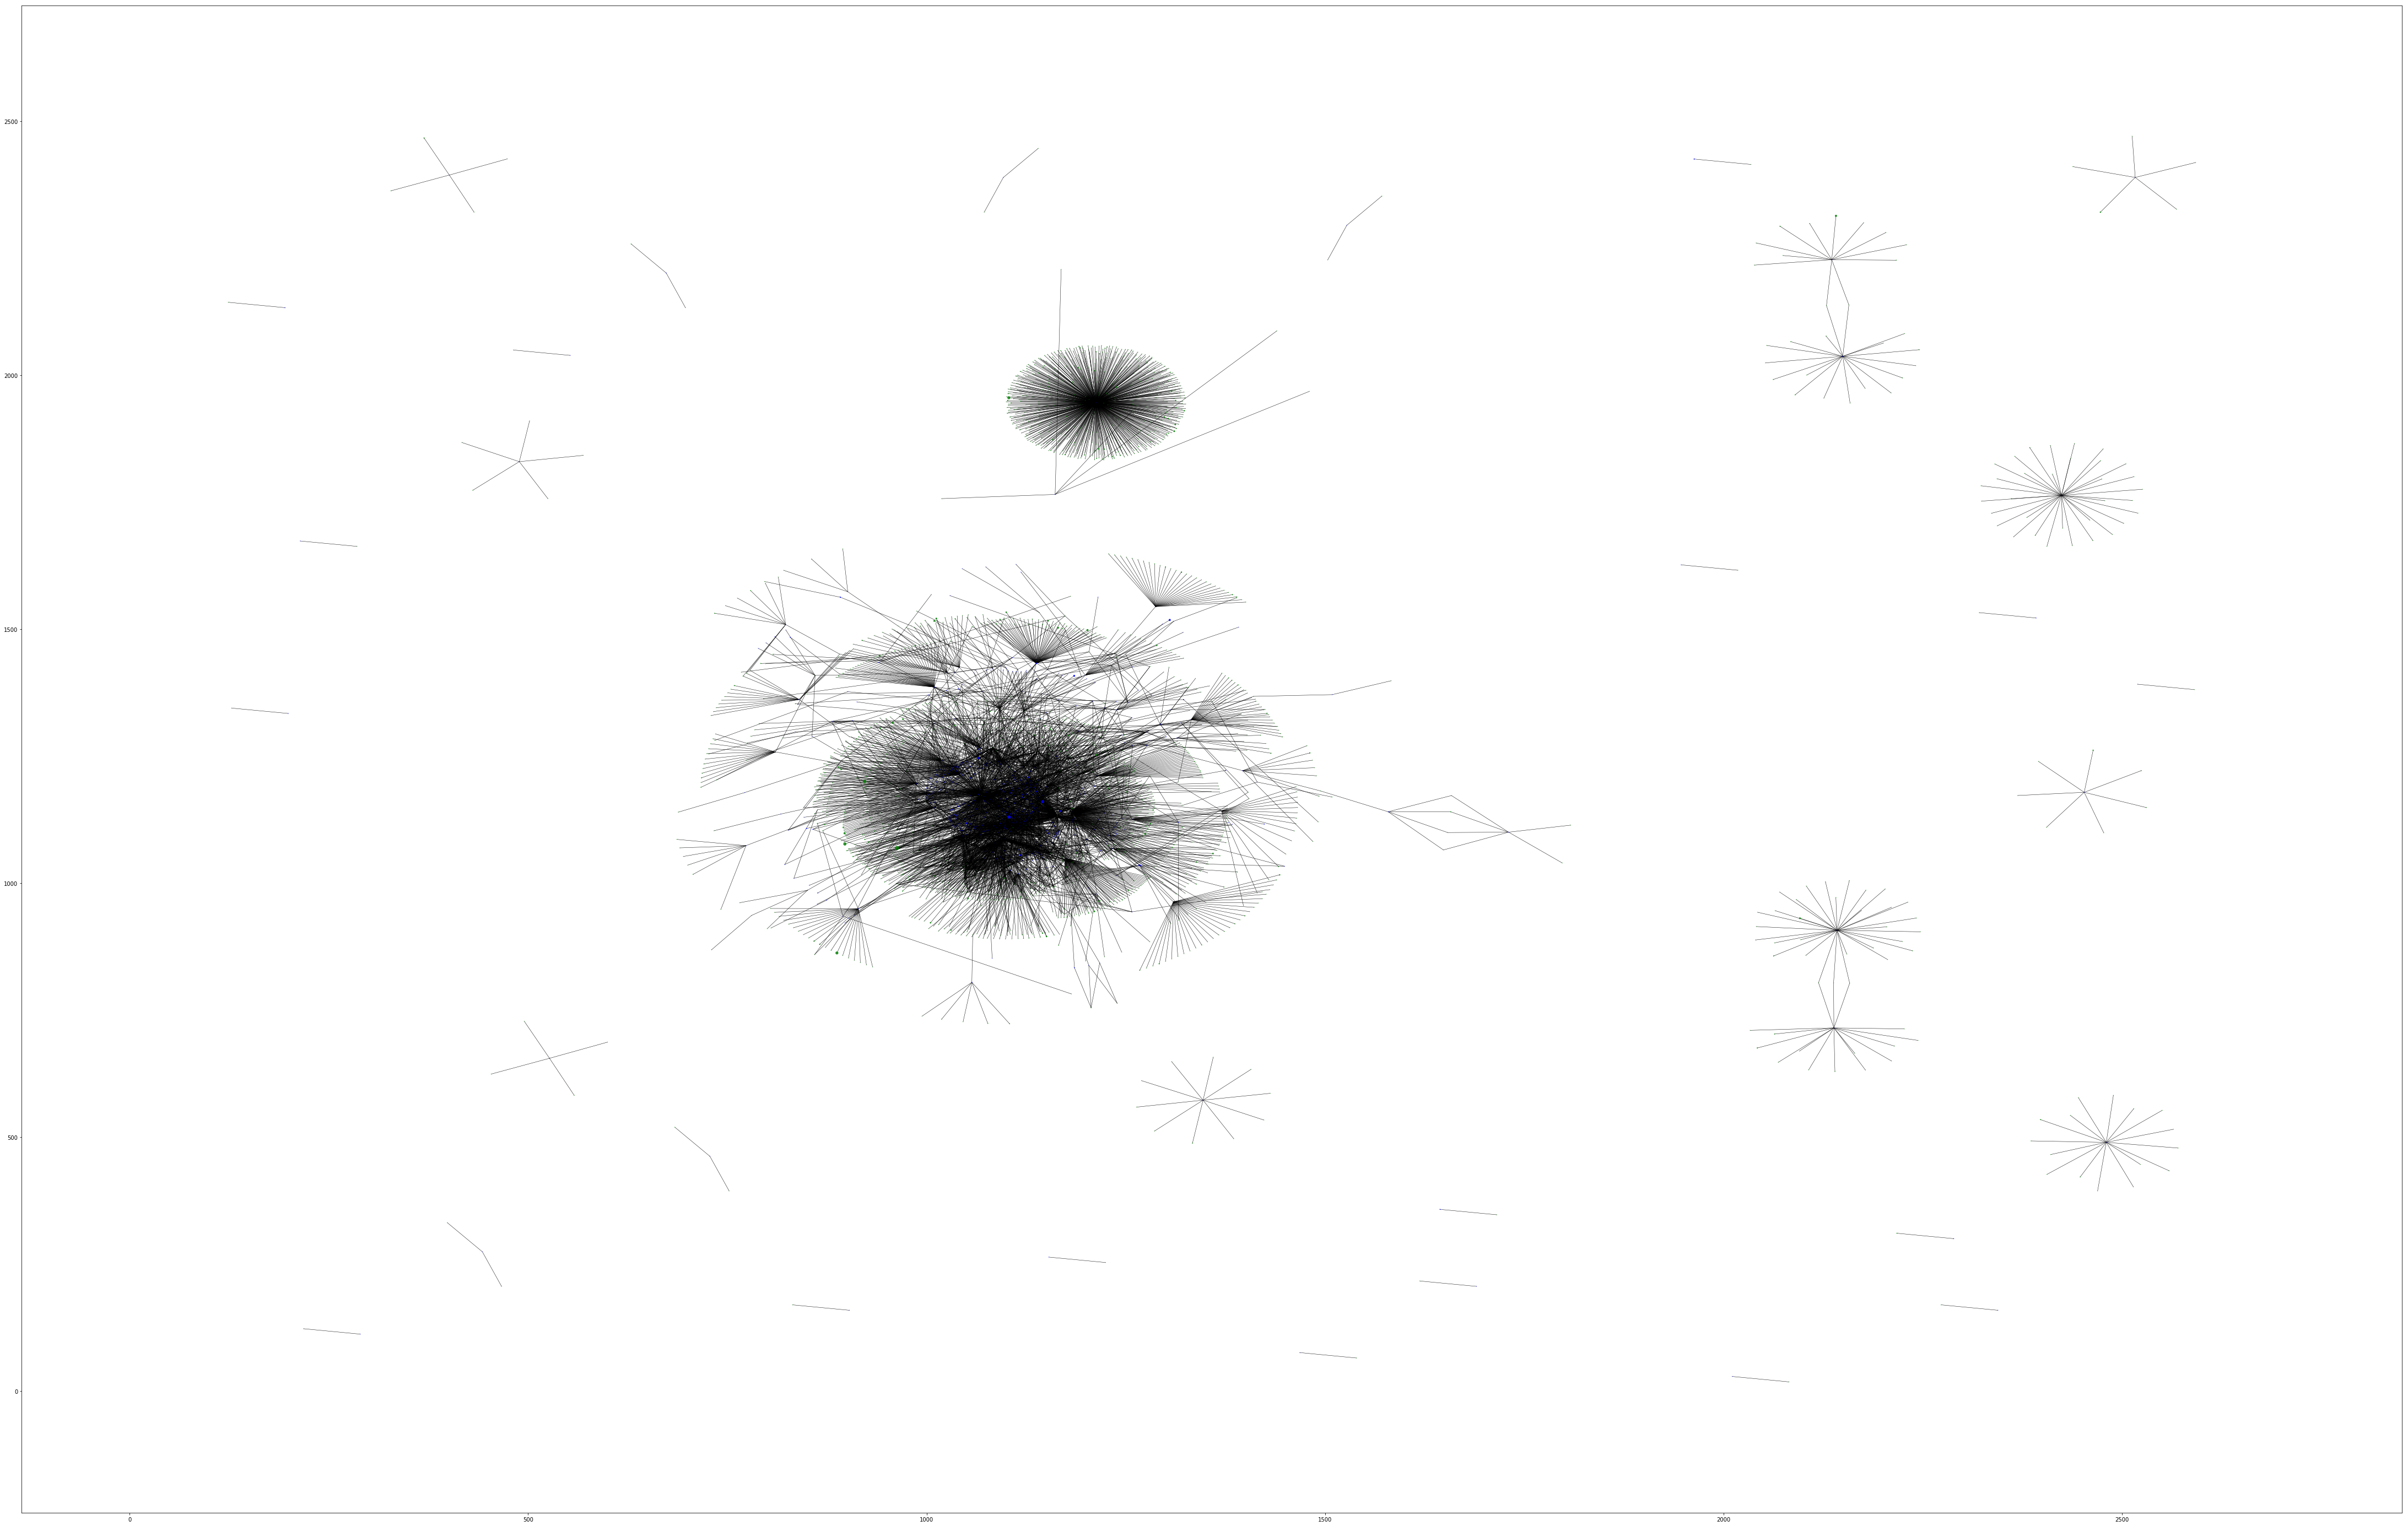

In [33]:
plotMultipartiteGraph(M)